In [ ]:
#Dataset is acquired from UCI repository
#At this illustration we are going to see the  PCA , Grid search  , Confusion matrix implementation

In [1]:
#reading data from dataset 

import pandas as pd 
data = pd.read_excel('/home/abhishek/projects/immunotherapy/Cryotherapy.xlsx')

In [2]:
#displaying the data
data


,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0
5,1,41,8.00,2,2,20,1
6,1,36,11.00,2,1,8,0
7,1,59,3.50,3,3,20,0
8,1,20,4.50,12,1,6,1
9,2,34,11.25,3,3,150,0


In [3]:
#assigning factors 

factors = ['sex','age','Time','Number_of_Warts','Type','Area']
Y = data['Result_of_Treatment']
X = data[factors]

In [4]:
X

,sex,age,Time,Number_of_Warts,Type,Area
0,1,35,12.00,5,1,100
1,1,29,7.00,5,1,96
2,1,50,8.00,1,3,132
3,1,32,11.75,7,3,750
4,1,67,9.25,1,1,42
5,1,41,8.00,2,2,20
6,1,36,11.00,2,1,8
7,1,59,3.50,3,3,20
8,1,20,4.50,12,1,6
9,2,34,11.25,3,3,150


In [5]:
Y

0     0
1     1
2     0
3     0
4     0
5     1
6     0
7     0
8     1
9     0
10    0
11    1
12    1
13    1
14    0
15    1
16    0
17    0
18    1
19    1
20    1
21    1
22    1
23    0
24    1
25    0
26    1
27    0
28    0
29    1
     ..
60    1
61    0
62    0
63    0
64    0
65    1
66    0
67    0
68    1
69    0
70    0
71    1
72    1
73    1
74    0
75    1
76    0
77    0
78    1
79    1
80    1
81    1
82    1
83    0
84    1
85    0
86    1
87    0
88    1
89    1
Name: Result_of_Treatment, Length: 90, dtype: int64

In [6]:
#splitting the dataset for testing and training

from sklearn.cross_validation import train_test_split
X_train , X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size = 0.25 ,random_state = 1)

/home/abhishek/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline

In [8]:
#creating a pipe to scale the data and regress it .

pipe_lr = Pipeline([('scl',StandardScaler()),('pca', PCA(n_components = 2)),('clf',LogisticRegression(random_state = 1))])

In [9]:
pipe_lr.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [10]:
print('Obtain test accuracy : %.5f' % pipe_lr.score(X_test,Y_test))

Obtain test accuracy : 0.82609


In [11]:
#Now we going to see example for the stratified K fold which is the LEAVE ONE OUT method , Here we set number folds 
#equal to training samples (K=n) , So only one training sample is used to test for each iteration 

In [11]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold

In [12]:
kfold = StratifiedKFold(y = Y_train,n_folds=10,random_state=1)
scores = []

In [13]:
for k, (train,test) in enumerate(kfold):
    pipe_lr.fit(X_train.iloc[train] ,Y_train.iloc[train])
    score = pipe_lr.score(X_train.iloc[test],Y_train.iloc[test])
    scores.append(score)
    print('Fold %s ,class dist. : %s , Acc %.3f' % (k+1, np.bincount(Y_train.iloc[train]),score))

Fold 1 ,class dist. : [27 33] , Acc 0.714
Fold 2 ,class dist. : [27 33] , Acc 0.857
Fold 3 ,class dist. : [27 33] , Acc 0.714
Fold 4 ,class dist. : [27 33] , Acc 0.571
Fold 5 ,class dist. : [27 33] , Acc 0.714
Fold 6 ,class dist. : [27 33] , Acc 0.857
Fold 7 ,class dist. : [27 33] , Acc 1.000
Fold 8 ,class dist. : [27 34] , Acc 0.833
Fold 9 ,class dist. : [27 34] , Acc 0.667
Fold 10 ,class dist. : [27 34] , Acc 1.000


In [14]:
print('CV accuracy: %.2f +/- %.2f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.79 +/- 0.13


In [15]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
pipe_svc = Pipeline([('scl', StandardScaler()),  ('clf', SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,  'clf__kernel': ['linear']},  {'clf__C': param_range,  'clf__gamma': param_range,  'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,  param_grid=param_grid,  scoring='accuracy',  cv=10,  n_jobs=-1)
gs = gs.fit(X_train, Y_train)
print(gs.best_score_)
print(gs.best_params_)

/home/abhishek/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.925373134328
{'clf__gamma': 0.1, 'clf__C': 10.0, 'clf__kernel': 'rbf'}


In [16]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator=pipe_lr,X=X_train,y=Y_train,cv=10,n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
np.std(scores)))

CV accuracy scores: [ 0.71428571  0.85714286  0.71428571  0.57142857  0.71428571  0.85714286
  1.          0.83333333  0.66666667  1.        ]
CV accuracy: 0.793 +/- 0.134


In [45]:
#Now let us see the graphical format of bias and variance in this dataset 

In [17]:
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(penalty='l2', random_state=0))])
train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_lr,X=X_train,y=Y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


/home/abhishek/anaconda2/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


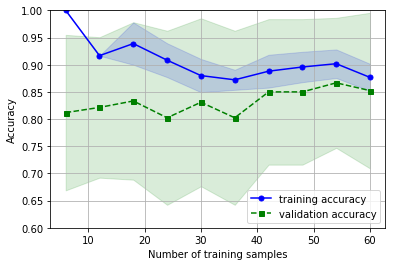

In [18]:
plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.0])
plt.show()

In [50]:
#addressing overfitting aand under fitting curves 

In [19]:
from sklearn.learning_curve import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve( estimator=pipe_lr, X=X_train, y=Y_train, param_name='clf__C', param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

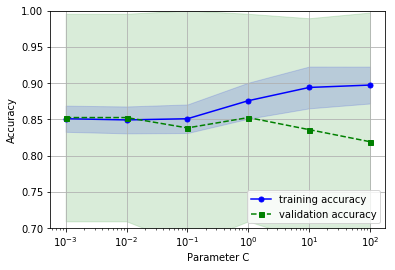

In [20]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.0])
plt.show()

In [53]:
#Now we could see tuning the parameters via Grid search 

In [21]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
pipe_svc = Pipeline([('scl', StandardScaler()),  ('clf', SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,  'clf__kernel': ['linear']},  {'clf__C': param_range,  'clf__gamma': param_range,  'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,  param_grid=param_grid,  scoring='accuracy',  cv=10,  n_jobs=-1)
gs = gs.fit(X_train, Y_train)
print(gs.best_score_)
print(gs.best_params_)

0.925373134328
{'clf__gamma': 0.1, 'clf__C': 10.0, 'clf__kernel': 'rbf'}


In [67]:
#So at above grid , we can see that among algorithms used SVM kernel performs best with our dataset .

In [55]:
#reading confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, Y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=Y_test, y_pred=y_pred)
print(confmat)

[[11  1]
 [ 0 11]]


In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Precision: %.3f' % precision_score(  y_true=Y_test, y_pred=y_pred))

print('Recall: %.3f' % recall_score(  y_true=Y_test, y_pred=y_pred))

print('F1: %.3f' % f1_score(  y_true=Y_test, y_pred=y_pred))

Precision: 0.917
Recall: 1.000
F1: 0.957


In [ ]:
# Implementing ROC curve Receiver operator characteristic (ROC) graphs are useful tools for selecting models
# for classification based on their performance with respect to the false positive and
# true positive rates, which are computed by shifting the decision threshold of the
# classifier. The diagonal of an ROC graph can be interpreted as random guessing,
# and classification models that fall below the diagonal are considered as worse than
# random guessing. A perfect classifier would fall into the top-left corner of the graph
# with a true positive rate of 1 and a false positive rate of 0. Based on the ROC curve,
# we can then compute the so-called area under the curve (AUC) to characterize the
# performance of a classification model.

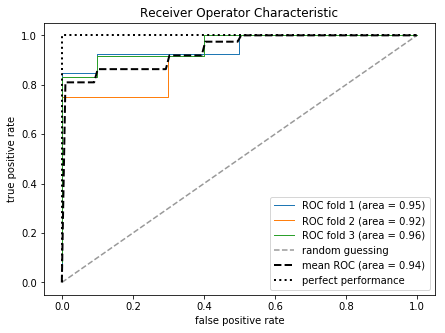

In [31]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
cv = StratifiedKFold(Y_train, n_folds=3, random_state=1)
fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
for i, (train, test) in enumerate(cv):
	probas = pipe_lr.fit(X_train.iloc[train],Y_train.iloc[train]).predict_proba(X_train.iloc[test])
	fpr, tpr, thresholds = roc_curve(Y_train.iloc[test],probas[:, 1],pos_label=1)
	mean_tpr += interp(mean_fpr, fpr, tpr)
	mean_tpr[0] = 0.0
	roc_auc = auc(fpr, tpr)
	plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label='mean ROC (area = %0.2f)' % mean_auc, lw=2) 
plt.plot([0, 0, 1], [0, 1, 1], lw=2, linestyle=':', color='black', label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")
plt.show()